## Predictions for created models

In [1]:
import pandas as pd
import numpy as np
import os
import pickle
import sys

sys.path.append(os.path.join(os.environ['PWD'],'scripts'))
from Data_Prep import Data_Prep
from utils import get_metrics_score
from utils import make_confusion_matrix

In [2]:
train = pd.read_csv(os.path.join(os.environ['PWD'],'data/train.csv'))
test = pd.read_csv(os.path.join(os.environ['PWD'],'data/test.csv'))

In [3]:
X_train = train.drop('Attrition_Flag',axis=1)
y_train = train['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1}).astype('int')
X_test = test.drop('Attrition_Flag',axis=1)
y_test = test['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1}).astype('int')

In [4]:
models = {}

In [5]:
model_path = os.path.join(os.environ['PWD'],'models')
for filename in os.listdir(model_path):
    f = os.path.join(model_path, filename)
    pickle_off = open(f, 'rb')
    models[filename] = pickle.load(pickle_off)

/opt/conda/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [8]:
estimator_score = pd.DataFrame()
for model in models:
    score = get_metrics_score(models[model],X_train, X_test, y_train, y_test,flag=False)
    score.insert(0, 'model', model)

    estimator_score = pd.concat((estimator_score,score), axis=0)
    
estimator_score.set_index('model', drop=True, inplace=True)

In [9]:
estimator_score

,Accuracy Training,Accuracy Test,Recall Training,Recall Test,Precision Training,Precision Test,F1 Training,F1 Test,AUC Training,AUC Test,Logloss Training,Logloss Test
model,,,,,,,,,,,,
xgboost_ros.pkl,0.991236,0.970879,0.999232,0.926154,0.948942,0.895833,0.973438,0.910741,0.999829,0.993428,0.035275,0.080074
xgboost_ros_selected.pkl,0.999506,0.970879,1.000000,0.910769,0.996937,0.907975,0.998466,0.909370,1.000000,0.989966,0.006381,0.122162


In [16]:
best_estimator = estimator_score.sort_values('Logloss Test').index.values[0]

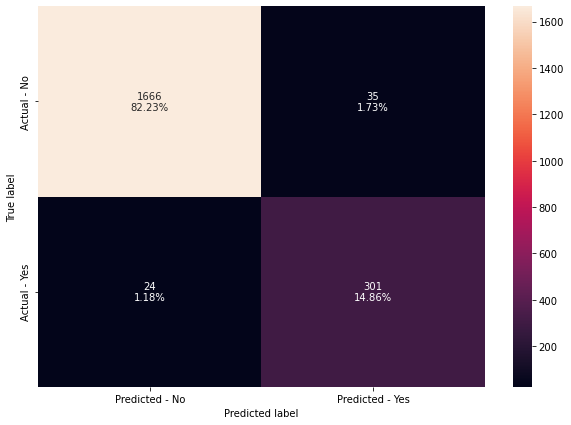

In [17]:
# Confusion matrix
make_confusion_matrix(models[best_estimator],X_test,y_test)